## Importing Libraries

In [120]:
import scipy
from scipy import stats
import math
import numpy as np

__Example 8.3.4__ (Confidence interval for µ when using a large sample) A manufacturing engineer decided
to check the efficiency of a new technician hired by the company. She records the time taken by the
technician to complete 100 randomly selected jobs and found that in this sample of 100, the average time
taken per job was 10 hours with a standard deviation of two hours. Find 95% lower and upper one-sided
confidence intervals for µ, the average time taken by a technician to complete one job.

In [121]:
# Normal interval
# parameters: alpha = confidence percentage, loc = sample mean, scale = standard error 
stats.norm.interval(alpha=0.9, loc=10, scale=2/10)

(9.671029274609705, 10.328970725390295)

### Alternative: making our own function to compute z-intervals (one or two-tailed) 

In [122]:
def confidence_interval(conf_level, x_bar, stdev, n, alternative='two-sided', mu=0):
    alpha = 1 - conf_level / 100
    
    if alternative == 'two-sided':
        half_alpha = alpha / 2
        z_val = (x_bar - mu) / (stdev / math.sqrt(n))
        z_score = abs(stats.norm.ppf(half_alpha))
        interval = (x_bar - z_score * stdev / math.sqrt(n), x_bar + z_score * stdev / math.sqrt(n))
        
        print("Z:", z_val)
        print("Z-score:", str(z_score))
        print("Interval:", interval)
    
    elif alternative == 'left-tail':
        z_val = (x_bar - mu) / (stdev / math.sqrt(n))
        z_score = stats.norm.ppf(alpha)
        interval = (-math.inf, x_bar + z_score * stdev / math.sqrt(n))
        
        print("Z:", z_val)
        print("Z-score:", str(z_score))
        print("Interval:", interval)
        
    elif alternative == 'right-tail':
        z_val = (x_bar - mu) / (stdev / math.sqrt(n))
        z_score = stats.norm.ppf(alpha)
        interval = (x_bar + z_score * stdev / math.sqrt(n), math.inf)
        
        print("Z:", z_val)
        print("Z-score:", str(z_score))
        print("Interval:", interval)

In [123]:
# computing a TWO-SIDED confidence z-interval 
confidence_interval(90, 10, 2, 100)

Z: 50.0
Z-score: 1.6448536269514729
Interval: (9.671029274609705, 10.328970725390295)


In [124]:
# computing a LEFT-TAILED confidence z-interval
confidence_interval(95, 10, 2, 100, 'left-tail')

Z: 50.0
Z-score: -1.6448536269514722
Interval: (-inf, 9.671029274609706)


In [125]:
# computing a RIGHT-TAILED confidence z-interval
confidence_interval(5, 10, 2, 100, 'right-tail')

Z: 50.0
Z-score: 1.6448536269514722
Interval: (10.328970725390294, inf)


__Example 8.3.4__ Consider the following data from a population with an unknown mean µ and unknown
standard deviation σ:
`
23 25 20 16 19 35 42 25 28 29 36 26 27 35 41 30
20 24 29 26 37 38 24 26 34 36 38 39 32 33 25 30
`

Use Python to find a 95% confidence interval for the mean µ.

In [126]:
x = [23,25,20,16,19,35,42,25,28,29,36,26,27,35,41,30,20,24,29,26,37,38,24,26,34,36,38,39,32,33,25,30]

In [127]:
stats.norm.interval(alpha=0.95, loc=np.mean(x), scale=np.std(x)/np.sqrt(len(x)))

(27.296334222765356, 31.953665777234644)

In [128]:
confidence_interval(95, np.mean(x), np.std(x), len(x))  # the length (len) of x will give us the sample size

Z: 24.934421079074585
Z-score: 1.959963984540054
Interval: (27.296334222765356, 31.953665777234644)


In [129]:
# t interval 
# parameters: alpha = confidence percentage, df = degrees of freedom (n - 1), loc = sample mean, scale = standard error

stats.t.interval(alpha=0.95, df=len(x) - 1, loc=np.mean(x), scale=np.std(x)/np.sqrt(len(x)))

(27.201820185322063, 32.04817981467794)

__Example 8.4.2__ (Constructing a confidence interval for $µ_1 − µ_2$ with unknown but equal variances) A sample of $n_1 = 5$ light bulbs of type A gives an average length of life of $\bar{X_1} = 1000$ hours with a standard deviation of $S_1 = 28$ hours. A sample of $n_2 = 7$ light bulbs of type B, gives $\bar{X_2} = 980$ hours, and $S_2 = 32$ hours. We assume that the processes are normally distributed with variances $σ_1^2$ and $σ_2^2$ that are equal, that is, $σ_1^2 = σ_2^2 = σ^2$. Find a 99% confidence interval for $µ_1 − µ_2 = µ_A − µ_B$.

In [130]:
stats.ttest_ind_from_stats(mean1=1000, mean2=980, std1=28, std2=32, nobs1=5, nobs2=7, equal_var=True)

Ttest_indResult(statistic=1.1212421273061306, pvalue=0.28838768610572835)

**Pooled Standard Error**
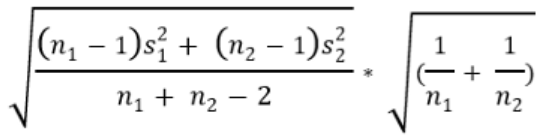

In [131]:
mean_difference = 1000 - 980
n1 = 5
s1 = 28
n2 = 7
s2 = 32
# since we are told that population variances are equal for both type A and type B... 
pooled_var = ((n1 - 1)*(s1**2) + (n2 - 1)*(s2**2))/(n1 + n2 - 2)

# calculating standard error
pooled_standard_error = np.sqrt((pooled_var / n1) + (pooled_var / n2))

# calculating t-interval
stats.t.interval(alpha=0.99, df=n1 + n2 - 2, loc=mean_difference, scale=pooled_standard_error)

(-36.53145899521733, 76.53145899521732)

__Example 8.4.4__ (Yarn breaking strength test) A sample of 61 strands of type I yarn, when subjected to
breaking-strength tests, yielded a sample average of $\bar{X}_I = 1400$ psi with a sample standard deviation of $S_I = 120$ psi. A sample of 121 strands of type M yarn was also subjected to the same breaking strength tests and yielded a sample average of $\bar{X}_M = 1250$ psi and a sample standard deviation of $S_M = 80$ psi. Find a 95% confidence interval for $µ_I − µ_M$, assuming normality of breaking strengths of both types of yarn. Assume that $σ^2_I$ $\neq$ $σ^2_M$.

In [132]:
stats.ttest_ind_from_stats(mean1=1400, mean2=1250, std1=120, std2=80, nobs1=61, nobs2=121, equal_var=False)

Ttest_indResult(statistic=8.824168564953624, pvalue=9.692812594551684e-14)

Since we are assuming __normality and unequal variances__, we will calcualte the degrees of freedom using:
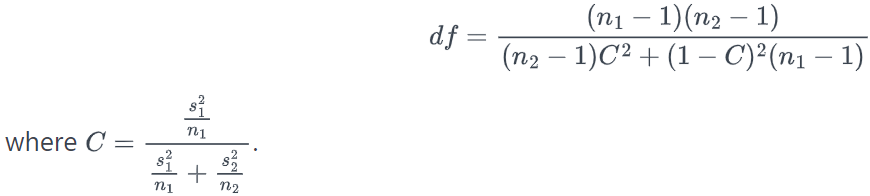

In [133]:
# variables needed:
mean_difference = 1400 - 1250
n1 = 61
s1 = 120
n2 = 121
s2 = 80

# using unpooled method to calculate standard error
unpooled_se = np.sqrt(s1**2 / n1 + s2**2 / n2)

# calculating degrees of freedom
C = (s1**2/n1) / ((s1**2/n1) + (s2**2/n2))
df = ((n1 - 1) * (n2 - 1)) / ((n2 - 1) * C**2 + (1 - C)**2 * (n1 - 1))

# calculating the interval
stats.t.interval(alpha=0.95, df=df, loc=mean_difference, scale=unpooled_se)

(116.21689721366184, 183.78310278633816)

__Example 8.5.3__ (Confidence interval for $σ^2$ and σ) In a certain car-manufacturing company the time
taken by a worker to finish a paint job on a car is normally distributed with mean µ and variance $σ^ 2$. Fifteen randomly selected car paint jobs are assigned to that worker and the time taken by the worker to finish each job is jotted down. These data yielded a sample standard deviation of S = 2.5 hours. Find a 95% two-sided confidence interval and one-sided lower and upper confidence intervals for the population variance $σ^2$ and the standard deviation σ.

In [134]:
# Assign variables
alpha = 0.05
S = 2.5 
n = 15

# To obtain the two-sided confidence interval for σ^2
CI = [(n - 1)* S**2 / stats.chi2.ppf(1 - alpha / 2, n - 1), (n - 1)* S**2 / stats.chi2.ppf(alpha / 2,n - 1)]
print(CI)

# To obtain the two-sided confidence interval for σ
print(np.sqrt(CI))

# To obtain the one-sided confidence interval for σ^2
Lower_limit = (n - 1) * S**2 / stats.chi2.ppf(1 - alpha, n - 1)
print(Lower_limit)

Upper_limit = (n - 1) * S**2 / stats.chi2.ppf(alpha, n - 1)
print(Upper_limit) 

# To obtain the one-sided confidence interval for σ
print(np.sqrt(Lower_limit))
print(np.sqrt(Upper_limit))

[3.3500583503256784, 15.545258091834775]
[1.83031646 3.94274753]
3.6943538523861594
13.316832871780731
1.9220701996509284
3.6492235984906065


__Example 8.6.1__ (Confidence intervals for the ratio of two population variances) Two random samples of sizes 13 and 16 are selected from a group of patients with hypertension. The patients in the two samples are independently treated with drugs A and B. After a full course of treatments, these patients are evaluated. The data collected at the time of evaluation yielded sample standard deviations $S_A = S_1 = 6.5$ mmHg and $S_B = S_2 = 7.5$ mmHg. Assuming that the two sets of data come from independent normal populations with variances $σ^2_1$ and $σ^2_2$, respectively, determine a 95% two-sided confidence interval for $σ^2_1 / σ^2_2$. Also determine the one-sided confidence intervals for $σ^2_1 / σ^2_2$ and $σ_1/σ_2$.

In [135]:
# Assign variables
alpha = 0.05
n1 = 13
n2 = 16
S1 = 6.5
S2 = 7.5

CI = [(S1**2 / S2**2) * (1 / stats.f.ppf(1 - alpha / 2,n1 - 1, n2 - 1)), (S1**2 / S2**2) * (1 / stats.f.ppf(alpha / 2,n1 - 1, n2 - 1))]
CI

[0.25347267326232165, 2.3864310536746562]

In [136]:
# To obtain the two-sided confidence interval for σ_1 / σ_2
np.sqrt(CI)

array([0.5034607 , 1.54480777])

__Example 8.7.1__ (Large sample confidence interval for binomial parameter p) A random sample of 400
computer chips is taken from a large lot of chips and 50 of them are found to be defective. Find a 95% confidence interval for p the proportion of defective chips contained in the lot.

In [137]:
# Assign variables
alpha = 0.05
T = 50
n = 400
phat = T / n

# To obtain the two-sided confidence interval for p
print([phat - stats.norm.ppf(1 - alpha / 2) * np.sqrt(phat * (1 - phat) / n), phat - stats.norm.ppf(alpha / 2) * np.sqrt(phat * (1 - phat) / n)])

[0.09259014198914858, 0.15740985801085144]


__Example 8.7.2__ (A large sample confidence interval for the difference of two binomial parameters ($p_1−p_2$)). Two companies A and B claim that a new type of light bulb has a lifetime of more that 5000 hours. In a random sample of 400 bulbs manufactured by company A, 60 bulbs burned out before the claimed lifetime and in another random sample of 500 bulbs manufactured by company B, 100 bulbs burned out before the claimed lifetime. Find a point estimate and a 95% confidence interval for the true value of the difference ($p_1−p_2$), where $p_1$ and $p_2$ are the proportion of the bulbs manufactured by company A and company B, respectively, that burn out before the claimed lifetime of 5000 hours.

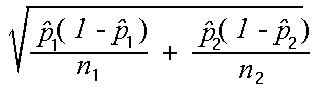

In [138]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, alpha=0.05):
    prop_a = success_a / size_a
    prop_b = success_b / size_b

    # z critical value
    confidence = 1 - alpha
    z_score = abs(stats.norm.ppf(confidence + alpha / 2))

    se = np.sqrt((prop_a * (1 - prop_a)) / size_a  +  (prop_b * (1 - prop_b)) / size_b)
    
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z_score * se
    return confint

In [139]:
two_proprotions_confint(success_a=60, size_a=400, success_b=100, size_b=500, alpha=0.05)

array([0.00046484, 0.09953516])